In [140]:
# coding=utf-8
# This is a sample Python script.
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as spi
import time

1. S (Susceptible)，易感者，指缺乏免疫能力健康人，与感染者接触后容易受到感染；
1. E (Exposed)，暴露者 ，指接触过感染者但不存在传染性的人，可用于存在潜伏期的传染病；
1. I (Infectious)，患病者，指有传染性的病人，可以传播给 S，将其变为 E 或 I ；
1. R (Recovered)，康复者，指病愈后具有免疫力的人，如是终身免疫性传染病，则不可被重新变为 S 、E 或 I ，如果免疫期有限，就可以重新变为 S 类，进而被感染。

微分方程: 对于微分方程应该设置极小的步长,符合微积分的思想

N*ds(t)/dt = m*N*r(t) - b*s(t)*N*i(t)

N*de(t)/dt = b*s(t)*N*i(t) - f*N*e(t)

N*di(t)/dt = f*N*e(t) - z*N*i(t)

N*dr(t)/dt = z*N*i(t) - m*N*r(t)

ds(t)/dt = m*r(t) - b*s(t)*i(t)

de(t)/dt = b*s(t)*i(t) - f*e(t)

di(t)/dt = f*e(t) - z*i(t)

dr(t)/dt = z*i(t) - m*r(t)

每一步骤变化顺序 E、I、R、S

In [141]:
# 总人数一百万人，假设初始感染者1000人，其余人为易感染，按毫秒计算
# 假设E状态不具有传染性

# total population
N = 1409778724
# Susceptible N*s(t)
s = 1409685009
# Exposed N*e(t)
e = 0
# Infectious N*i(t)
i = 93715
# Recovered N*r(t)
r = 0


# each day contact
b = 5
# spread rate
s_r = 0.7
# disease incidence
f = 0.5
# the cure rate
z = 0.2


# each day state
state = [s, e, i, r]
# T0
ini = [s, e, i, r]

# result
whole_t = []
eachday = []
case = []

whole_t.append(state)

In [142]:
def funcSEIR(inivalue,_):
    result = np.zeros(4)
    result[0] = - s_r * b * inivalue[0] / N * inivalue[2]
    result[1] = b * inivalue[0] / N * inivalue[2] - f * inivalue[1]
    result[2] = f * inivalue[1] - z * inivalue[2]
    result[3] = z * inivalue[2]
    return result


In [143]:
result = spi.odeint(funcSEIR,ini,np.arange(0,50))

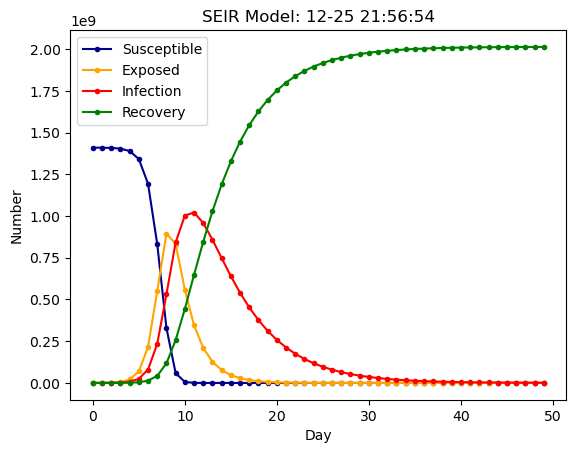

In [144]:
# plot the result
plt.plot(result[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(result[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(result[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(result[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIR Model: ' + time.strftime('%m-%d %H:%M:%S',time.localtime(time.time())))
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()


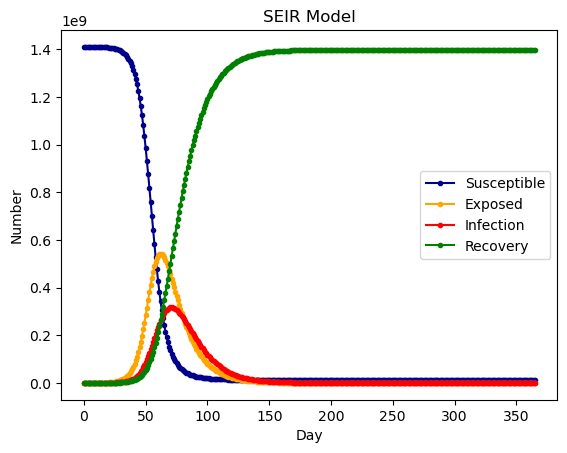

In [145]:
# N为人群总数
N = 1409778724
# β为传染率系数
beta = 0.2
# gamma为恢复率系数
gamma = 0.1
# Te为疾病潜伏期
Te = 14
# I_0为感染者的初始人数
I_0 = 93715
# E_0为潜伏者的初始人数
E_0 = 0
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0
# T为传播时间
T = 365

# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)

def funcSEIR(inivalue,_):
 Y = np.zeros(4)
 X = inivalue
 # 易感个体变化
 Y[0] = - (beta * X[0] *( X[2]+X[1])) / N
 # 潜伏个体变化
 Y[1] = (beta * X[0] *( X[2]+X[1])) / N - X[1] / Te
 # 感染个体变化
 Y[2] = X[1] / Te - gamma * X[2]
 # 治愈个体变化
 Y[3] = gamma * X[2]
 return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSEIR,INI,T_range)

plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIR Model: ' + time.strftime('%m-%d %H:%M:%S',time.localtime(time.time())))
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

## china covid cases number

data source:https://ourworldindata.org/coronavirus/country/china